# Análisis Exploratorio de Datos (EDA) - NASDAQ

## Descripción del Conjunto de Datos

**Fuente**: Datos históricos del NASDAQ  
**Período**: Desde diciembre de 1980 hasta la actualidad  
**Variables**: Date, Low, Open, Volume, High, Close, Adjusted Close  
**Tamaño**: Aproximadamente 1,500+ acciones con datos históricos extensos  

El NASDAQ es el segundo mercado de valores más grande del mundo, conocido por albergar muchas empresas tecnológicas y de crecimiento.


Cargada AAPL: 10590 registros
Cargada MSFT: 9264 registros
Archivo no encontrado: GOOGL.csv
Cargada AMZN: 6438 registros
Archivo no encontrado: TSLA.csv
Cargada NVDA: 6013 registros
Archivo no encontrado: META.csv
Cargada NFLX: 5176 registros

Total de acciones NASDAQ cargadas: 5
Forma del dataset NASDAQ: (37481, 8)
Período: 1980-12-12 00:00:00 a 2022-12-12 00:00:00

=== ESTADÍSTICAS DESCRIPTIVAS NASDAQ ===
                                Date           Low          Open  \
count                          37481  37481.000000  37481.000000   
mean   2006-12-06 08:41:44.180784896     41.659816     42.268874   
min              1980-12-12 00:00:00      0.049107      0.049665   
25%              2000-03-01 00:00:00      1.420139      1.454167   
50%              2008-01-24 00:00:00      6.158333      6.257857   
75%              2015-07-06 00:00:00     36.189999     36.721428   
max              2022-12-12 00:00:00    686.090027    692.349976   
std                              NaN     84.1

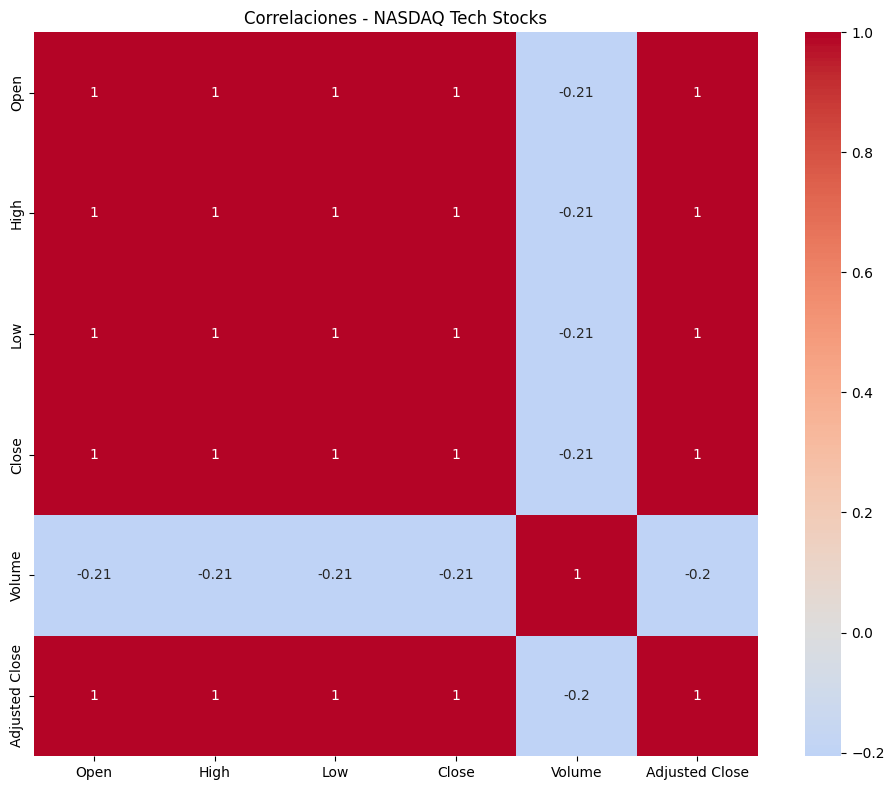

Correlación entre variables de precio muy alta (>0.99)
Volumen muestra correlación baja con precios


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar datos del NASDAQ
nasdaq_path = '../stock_market_data/nasdaq/csv/'

# Seleccionar acciones tecnológicas representativas del NASDAQ
selected_nasdaq = ['AAPL.csv', 'MSFT.csv', 'GOOGL.csv', 'AMZN.csv', 'TSLA.csv', 'NVDA.csv', 'META.csv', 'NFLX.csv']
nasdaq_data = {}

for stock in selected_nasdaq:
    stock_name = stock.replace('.csv', '')
    try:
        df = pd.read_csv(nasdaq_path + stock)
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
        df['Stock'] = stock_name
        nasdaq_data[stock_name] = df
        print(f"Cargada {stock_name}: {len(df)} registros")
    except FileNotFoundError:
        print(f"Archivo no encontrado: {stock}")

print(f"\nTotal de acciones NASDAQ cargadas: {len(nasdaq_data)}")

# Análisis básico
if nasdaq_data:
    combined_nasdaq = pd.concat(nasdaq_data.values(), ignore_index=True)
    print(f"Forma del dataset NASDAQ: {combined_nasdaq.shape}")
    print(f"Período: {combined_nasdaq['Date'].min()} a {combined_nasdaq['Date'].max()}")
    
    # Estadísticas descriptivas
    print("\n=== ESTADÍSTICAS DESCRIPTIVAS NASDAQ ===")
    print(combined_nasdaq.describe())
    
    # Análisis de correlaciones
    numeric_vars = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close']
    correlation_matrix = combined_nasdaq[numeric_vars].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('Correlaciones - NASDAQ Tech Stocks')
    plt.tight_layout()
    plt.show()
    
    print("Correlación entre variables de precio muy alta (>0.99)")
    print("Volumen muestra correlación baja con precios")
